<a href="https://colab.research.google.com/github/Prasad-Khedkar/Global-Terrorism-EDA/blob/main/Global_Terrorism(EDA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [3]:
path = '/content/drive/MyDrive/'

In [4]:
df = pd.read_csv(path + 'Global Terrorism Data.csv',encoding='latin-1')


/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:3326: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [5]:
pd.options.display.max_columns= None
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,Federal,Mexico city,19.371887,-99.086624,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.997490,23.762728,1.0,0,NaN,NaN,1,1,1,0.0,NaN,NaN,0.0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN

In [6]:
print(list(df.columns))

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [7]:
df.rename(columns={'iyear':'Year','imonth':'Month','iday':'Day','country_txt':'Country','region_txt':'Region','provstate':'State','attacktype1_txt':'Attack_Type','targtype1_txt':'Target_Type','target1':'Target_Name','nkill':'Killed','nwound':'Wounded','summary':'Summary','gname':'Group_Name','weaptype1_txt':'Weapon_Type','motive':'Motive'},inplace=True)
df = df[['Year','Country','Region','Attack_Type','Target_Type','Killed','Wounded','Group_Name','Weapon_Type']]

In [8]:
df.head()

,Year,Country,Region,Attack_Type,Target_Type,Killed,Wounded,Group_Name,Weapon_Type
0,1970,Dominican Republic,Central America & Caribbean,Assassination,Private Citizens & Property,1.0,0.0,MANO-D,Unknown
1,1970,Mexico,North America,Hostage Taking (Kidnapping),Government (Diplomatic),0.0,0.0,23rd of September Communist League,Unknown
2,1970,Philippines,Southeast Asia,Assassination,Journalists & Media,1.0,0.0,Unknown,Unknown
3,1970,Greece,Western Europe,Bombing/Explosion,Government (Diplomatic),NaN,NaN,Unknown,Explosives
4,1970,Japan,East Asia,Facility/Infrastructure Attack,Government (Diplomatic),NaN,NaN,Unknown,Incendiary


In [9]:
df.shape

(181691, 9)

In [10]:
df.describe()

,Year,Killed,Wounded
count,181691.000000,171378.000000,165380.000000
mean,2002.638997,2.403272,3.167668
std,13.259430,11.545741,35.949392
min,1970.000000,0.000000,0.000000
25%,1991.000000,0.000000,0.000000
50%,2009.000000,0.000000,0.000000
75%,2014.000000,2.000000,2.000000
max,2017.000000,1570.000000,8191.000000


In [11]:
df.isnull().sum()

Year               0
Country            0
Region             0
Attack_Type        0
Target_Type        0
Killed         10313
Wounded        16311
Group_Name         0
Weapon_Type        0
dtype: int64

In [12]:
df['Killed'].mean()

2.4032722986614385

In [13]:
df['Killed'].fillna(2.4,inplace=True)

In [14]:
df['Wounded'].mean()

3.1676684000483735

In [15]:
df['Wounded'].fillna(3.16,inplace=True)

In [16]:
df.isnull().sum()

Year           0
Country        0
Region         0
Attack_Type    0
Target_Type    0
Killed         0
Wounded        0
Group_Name     0
Weapon_Type    0
dtype: int64

#    **Univariate Analysis**



### Year-Wise Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


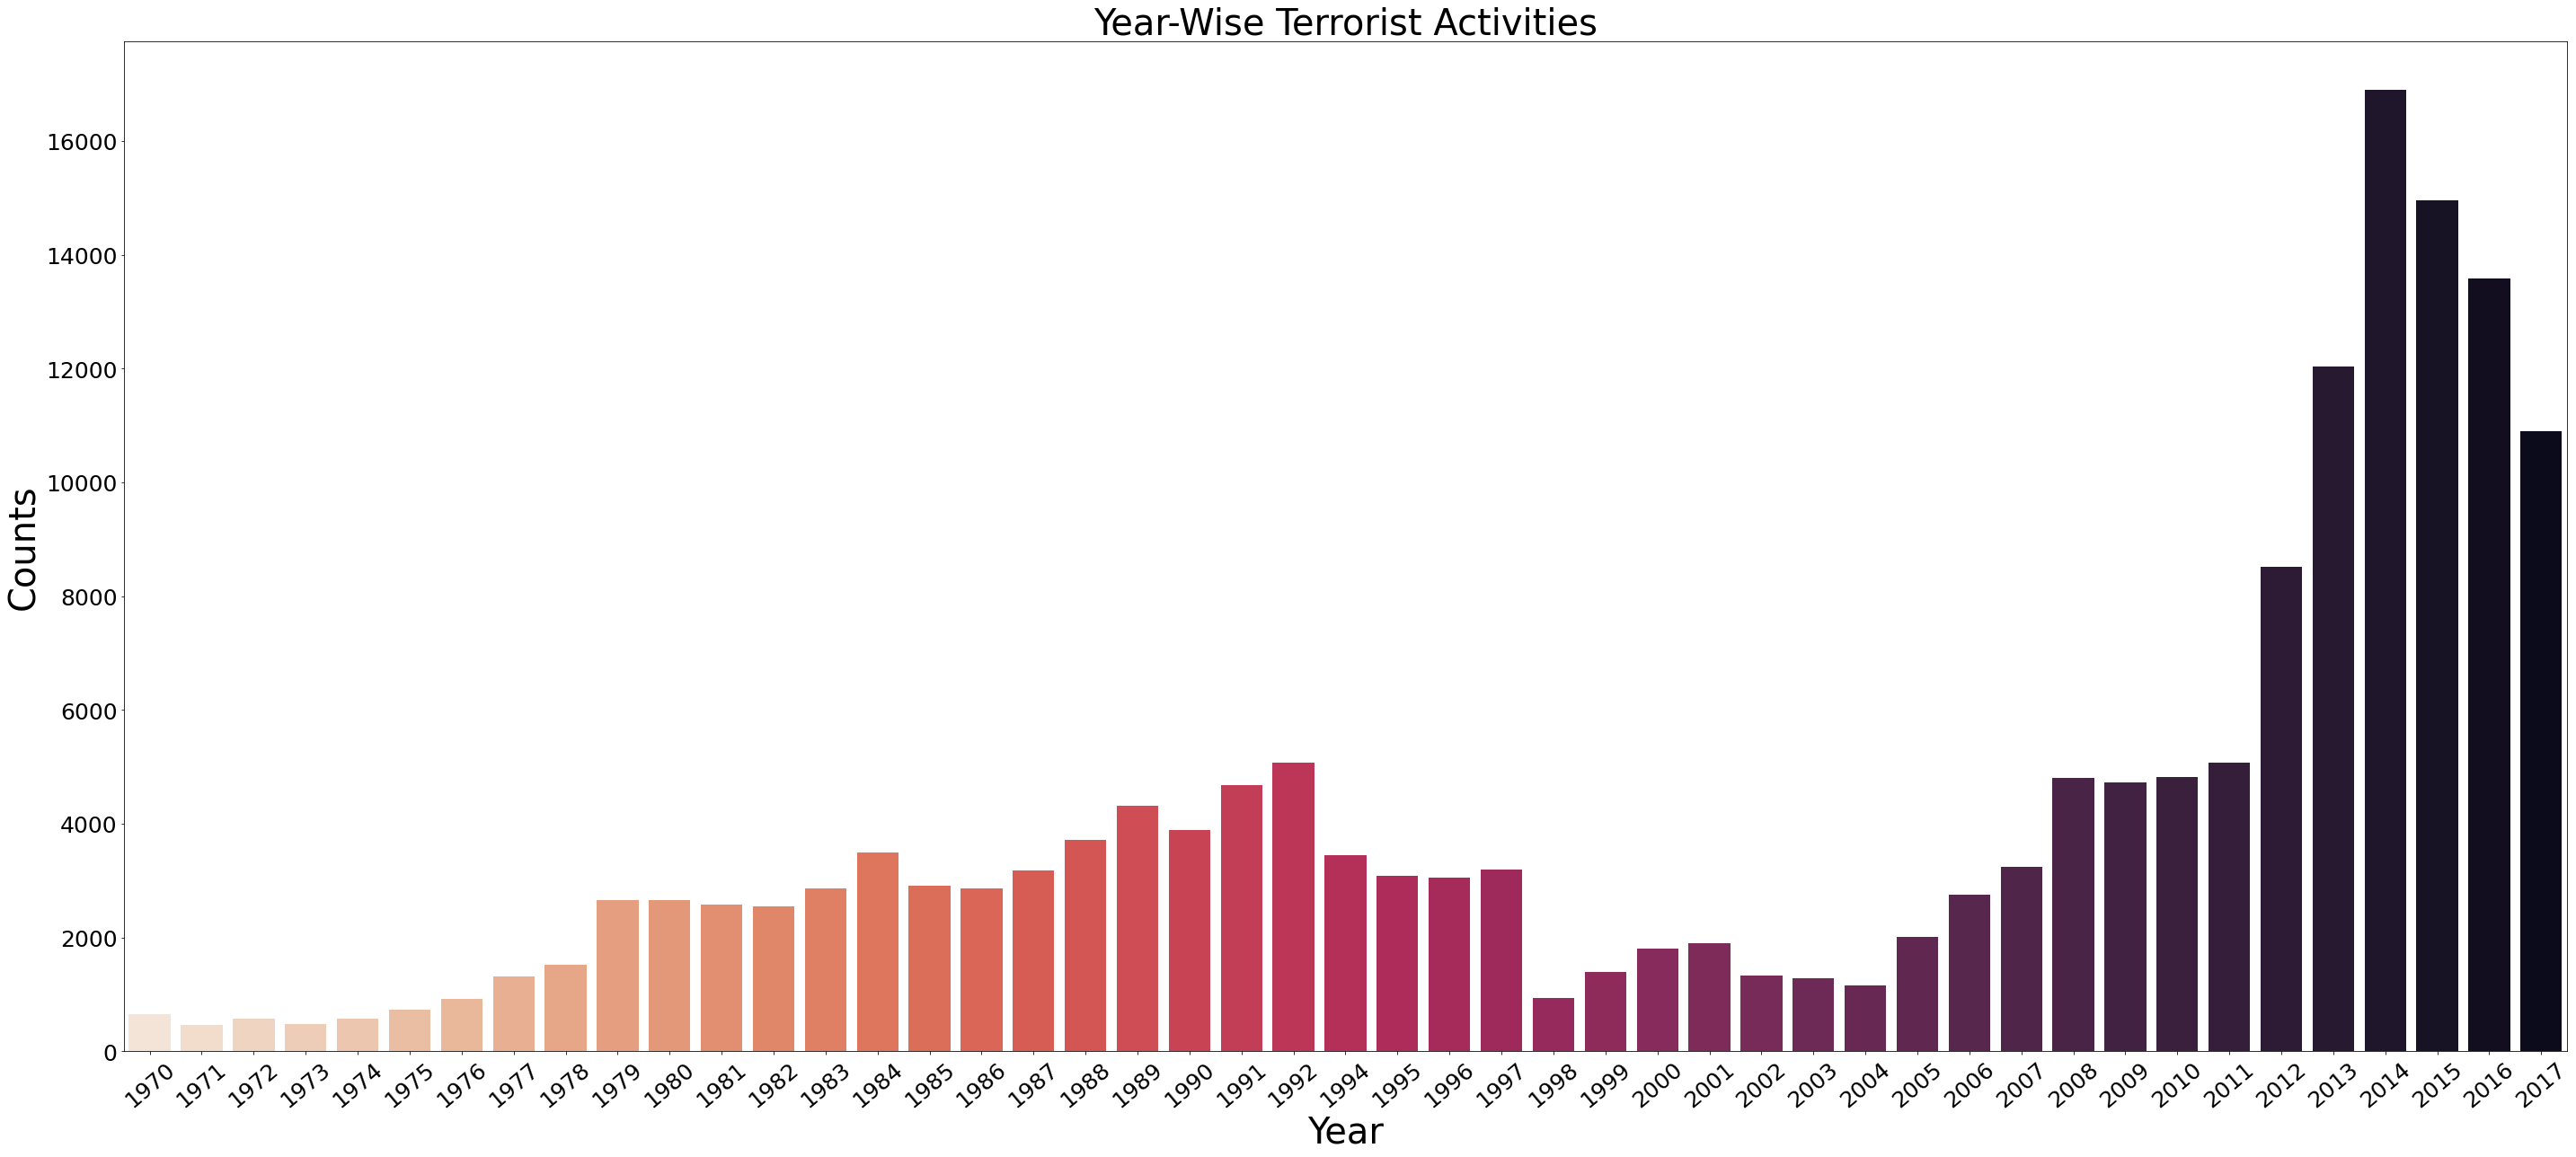

In [17]:
plt.figure(figsize=(40,18))
sns.countplot(df["Year"],palette='rocket_r')
plt.xticks(size=25,rotation =40)
plt.yticks(size=25)
plt.xlabel('Year',fontsize=40)
plt.ylabel('Counts',fontsize=40)
plt.title('Year-Wise Terrorist Activities',fontsize=40)
plt.tight_layout()
plt.show()


### Attack-Type Analysis

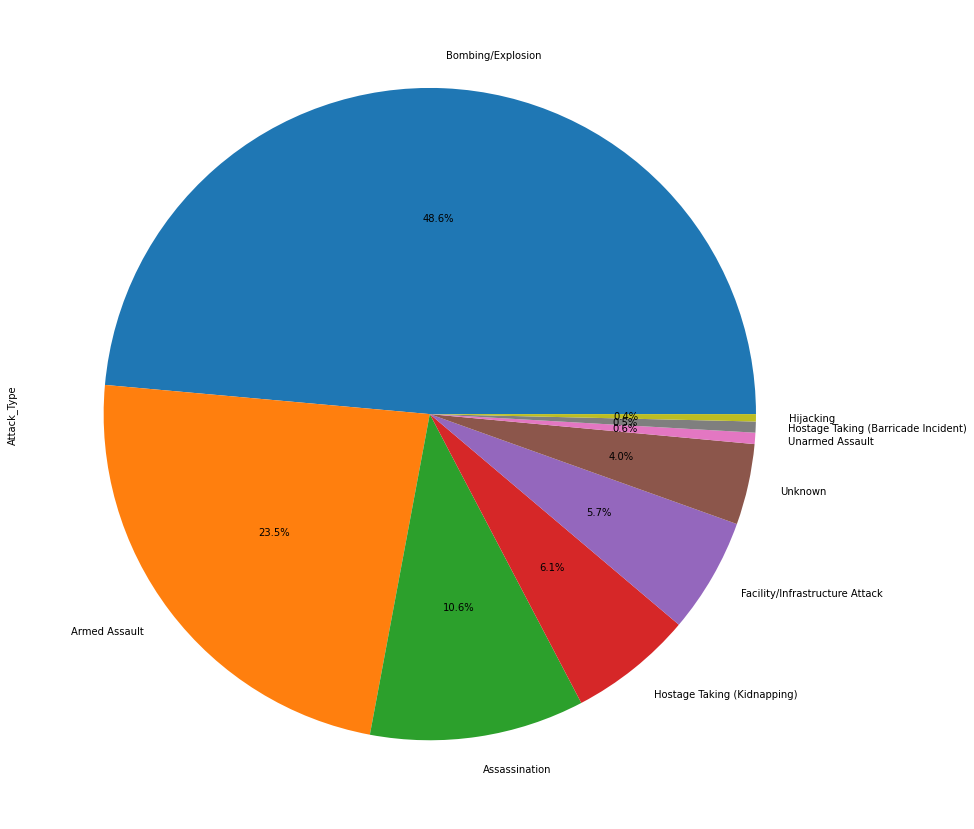

In [18]:
df['Attack_Type'].value_counts().plot(kind='pie',figsize=[20,15],autopct='%1.1f%%')
plt.show()

## Target-Type Analysis

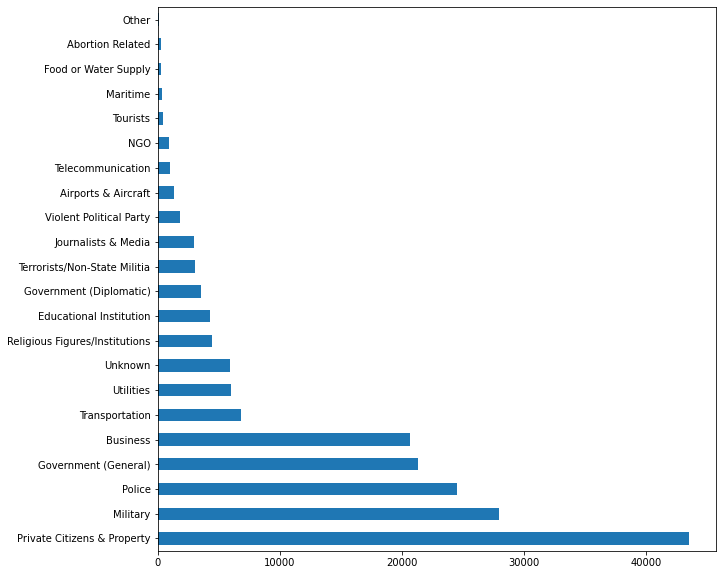

In [19]:
df['Target_Type'].value_counts().plot(kind='barh',figsize=[10,10])

## Weapon-Type Analysis

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


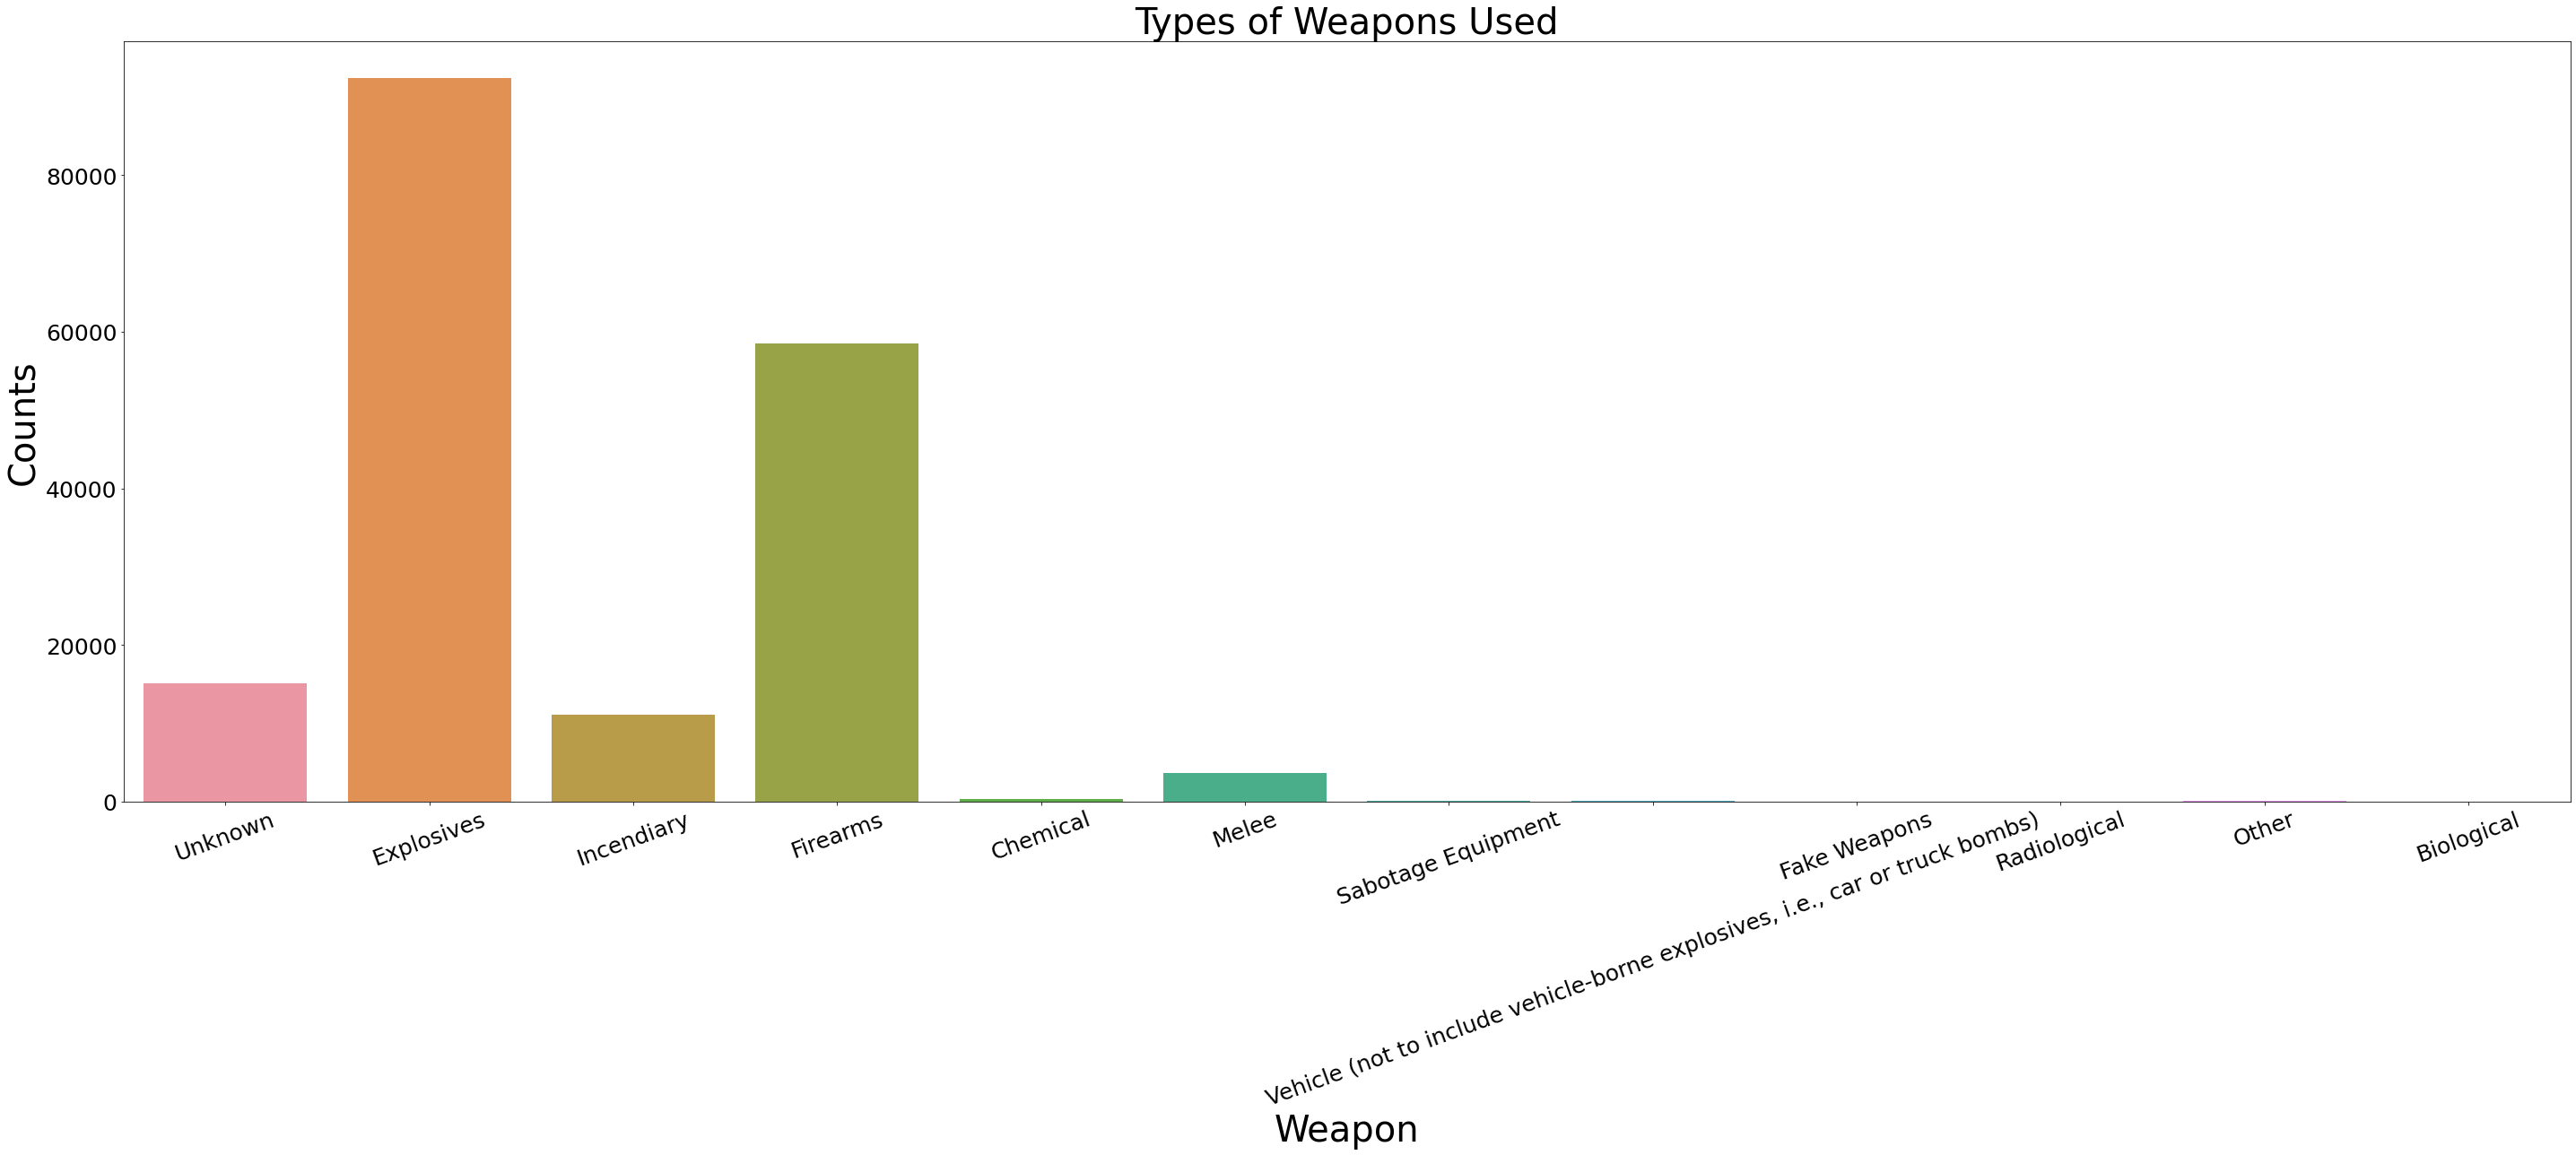

In [20]:
plt.figure(figsize=(40,18))
sns.countplot(df["Weapon_Type"])
plt.xticks(size=25,rotation = 20)
plt.yticks(size=25)
plt.xlabel("Weapon",fontsize=40)
plt.ylabel('Counts',fontsize=40)
plt.title('Types of Weapons Used',fontsize=40)
plt.tight_layout()
plt.show()

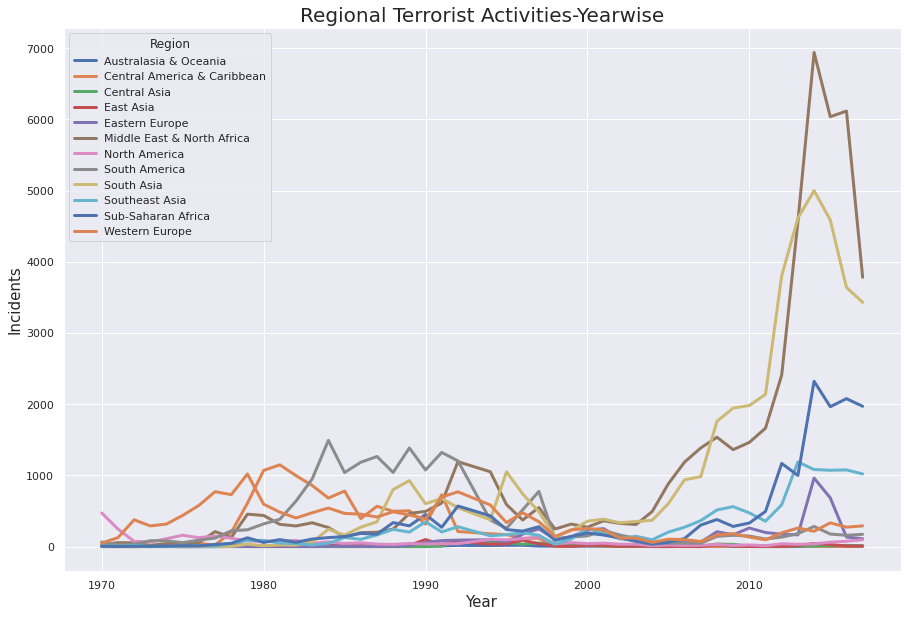

In [21]:
sns.set(style="darkgrid")
pd.crosstab(df.Year,df.Region).plot(kind='line',figsize=(15,10),linewidth=3)
plt.xlabel('Year',fontsize=15)
plt.ylabel('Incidents',fontsize=15)
plt.title('Regional Terrorist Activities-Yearwise',fontsize=20)
plt.show()

## Group-Wise Terrorist Activities

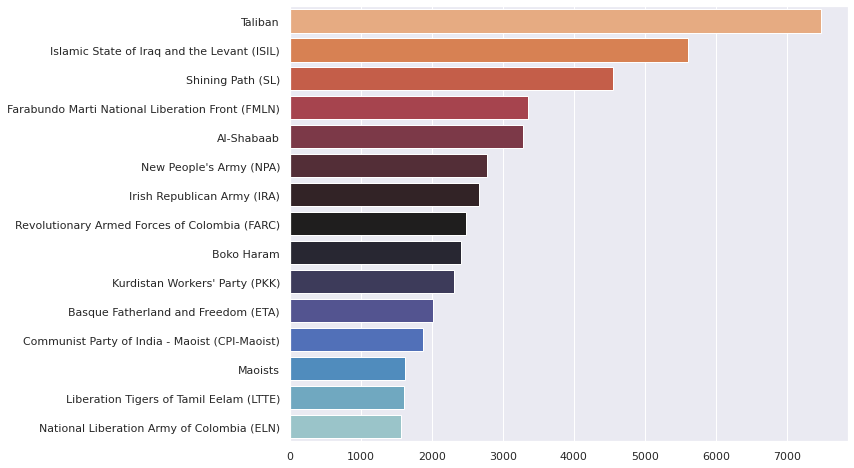

In [22]:
plt.figure(figsize=(10,8))
sns.barplot(data=df, x=df['Group_Name'].value_counts()[1:16].values, y=df['Group_Name'].value_counts()[1:16].index,palette=('icefire_r'))
plt.show()


# **Bivariate/Multivariate Analysis**

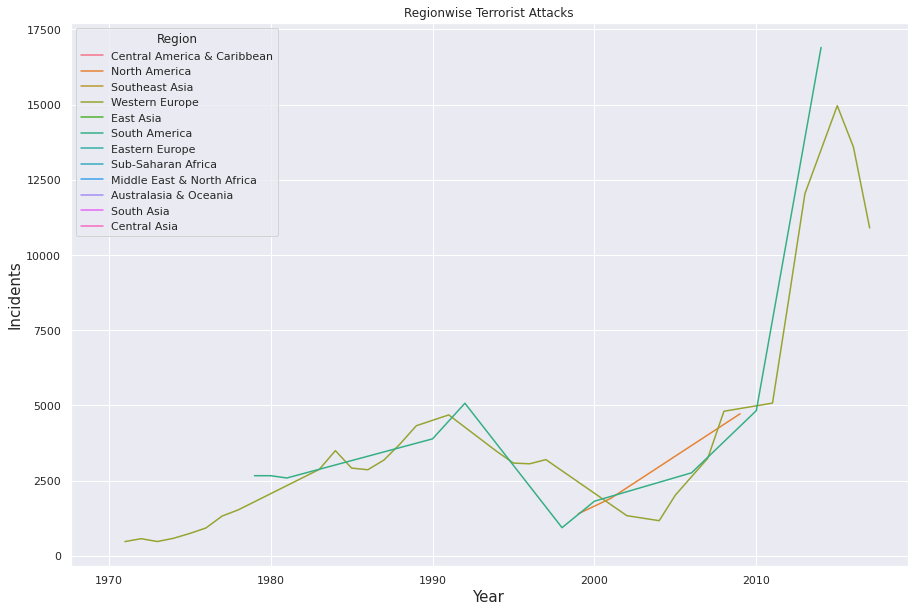

In [23]:
plt.figure(figsize=(15,10))
plt.title('Regionwise Terrorist Attacks')
plt.xlabel('Year',fontsize=15)
plt.ylabel('Incidents',fontsize=15)
sns.lineplot(x=df['Year'].index,y=df['Year'].value_counts(),hue=df['Region'])
plt.show()
